In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler

In [14]:
start = '2012-01-01'
end = '2024-12-21'
stock = 'GOOG'

data = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [15]:
data.reset_index(inplace=True)

In [16]:
data

Price,Date,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG
0,2012-01-03,16.513794,16.581795,16.190173,16.204321,147611217
1,2012-01-04,16.585020,16.633911,16.394919,16.504364,114989399
2,2012-01-05,16.354961,16.478056,16.285969,16.432392,131808205
3,2012-01-06,16.131853,16.379531,16.126144,16.358435,108119746
4,2012-01-09,15.447884,16.056905,15.417357,16.044495,233776981
...,...,...,...,...,...,...
3259,2024-12-16,198.160004,200.639999,194.110001,194.365005,32248600
3260,2024-12-17,197.119995,202.880005,196.690002,198.529999,24129500
3261,2024-12-18,190.149994,198.690002,189.279999,196.830002,27638400


In [17]:
ma_100_days = data.Close.rolling(100).mean()

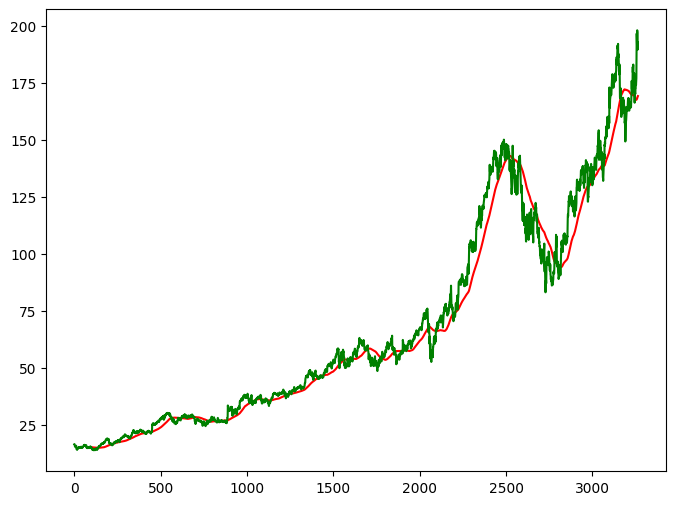

In [18]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [19]:
ma_200_days = data.Close.rolling(200).mean()

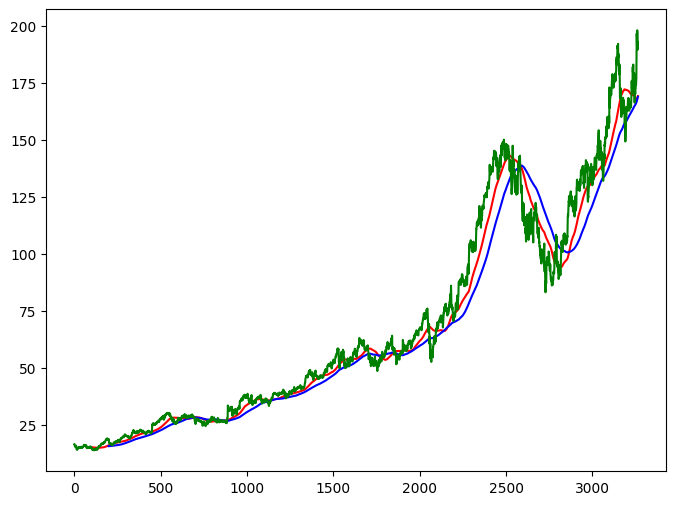

In [20]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [21]:
data.dropna(inplace=True)

In [22]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [23]:
data_train.shape[0]

2611

In [24]:
data_test.shape[0]

653

In [25]:
scaler = MinMaxScaler(feature_range=(0,1))

In [26]:
data_train_scale = scaler.fit_transform(data_train)

In [27]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])
    

In [28]:
x, y = np.array(x), np.array(y)

In [29]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [30]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [31]:
model.fit(x,y, epochs = 50, batch_size =32, verbose =1)

Epoch 1/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 25s 190ms/step - loss: 0.0459
Epoch 2/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 17s 218ms/step - loss: 0.0055
Epoch 3/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 26s 325ms/step - loss: 0.0048
Epoch 4/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 38s 280ms/step - loss: 0.0047
Epoch 5/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 38s 240ms/step - loss: 0.0038
Epoch 6/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 17s 218ms/step - loss: 0.0038
Epoch 7/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 22s 281ms/step - loss: 0.0037
Epoch 8/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 19s 236ms/step - loss: 0.0040
Epoch 9/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 19s 214ms/step - loss: 0.0028
Epoch 10/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 25s 321ms/step - loss: 0.0033
Epoch 11/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 33s 217ms/step - loss: 0.0029
Epoch 12/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 19s 241ms/step - loss: 0.0024
Epoch 13/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 17s 220ms/step - loss: 0.0025
Epoch 14/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 18s 222ms/step - loss: 0.0022
Epoch 15/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 19s 

In [32]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [37]:
pas_100_days = data_train.tail(100)

In [38]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [40]:
data_test_scale  =  scaler.fit_transform(data_test)

In [43]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [44]:
y_predict = model.predict(x)

18/18 [==============================] - 1s 42ms/step


In [49]:
scale =1/scaler.scale_

In [50]:
y_predict = y_predict*scale

In [51]:
y = y*scale

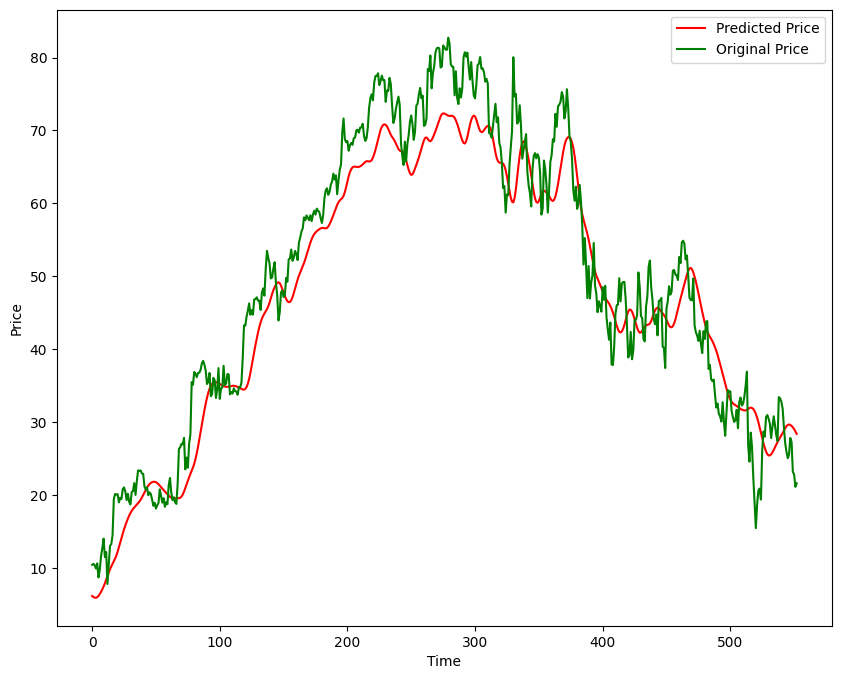

In [53]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [54]:
model.save('Stock Predictions Model.keras')